#Data Pre-Processing of Diabetes Dataset
The objective is to perform a thorough pre-processing of the diabetes dataset. The goal is to understand the dataset's structure, clean and prepare the data for further analysis, and address any issues related to outliers and missing values.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#dataset
diabetes = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/diabetes.csv")
diabetes

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y
1005,195,4543,f,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
1006,249,48822,M,55.0,4.2,57.0,8.9,5.3,3.1,0.7,3.3,1.4,27.0,Y
1007,88,21747,M,41.0,3.8,48.0,4.3,3.2,4.5,1.3,1.8,1.1,21.0,N


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1006 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


#Data Cleaning:

In [ ]:
#Rename Columns: Update column names such as 'ID' to 'Visit_ID' and 'No_Pation' to 'Patient_ID' to make them more descriptive and clear.
diabetes = diabetes.rename(columns= {'ID':'Visit_ID','No_Pation':'Patient_ID'})
diabetes

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y
1005,195,4543,f,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
1006,249,48822,M,55.0,4.2,57.0,8.9,5.3,3.1,0.7,3.3,1.4,27.0,Y
1007,88,21747,M,41.0,3.8,48.0,4.3,3.2,4.5,1.3,1.8,1.1,21.0,N


In [ ]:
#Check Unique Values in Categorical Columns:
diabetes['Gender'].unique()

array(['F', 'M', nan, 'f'], dtype=object)

In [ ]:
diabetes["CLASS"].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [ ]:
#Statistical Summary of Numerical Columns:
diabetes.describe()

,Visit_ID,Patient_ID,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1009.000000,1.009000e+03,1008.000000,1008.000000,1007.000000,1006.000000,1007.000000,1007.000000,1008.000000,1007.000000,1008.000000,1009.000000
mean,338.166501,2.717468e+05,53.596230,5.132979,68.938431,8.281372,4.862483,2.346783,1.202728,2.611708,1.850496,29.573062
std,239.479644,3.365681e+06,8.743882,2.930873,59.815673,2.534861,1.298665,1.396438,0.658038,1.115990,3.649872,4.953338
min,1.000000,1.230000e+02,25.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,126.000000,2.406400e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,294.000000,3.439900e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,547.000000,4.539100e+04,59.000000,5.700000,73.000000,10.175000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


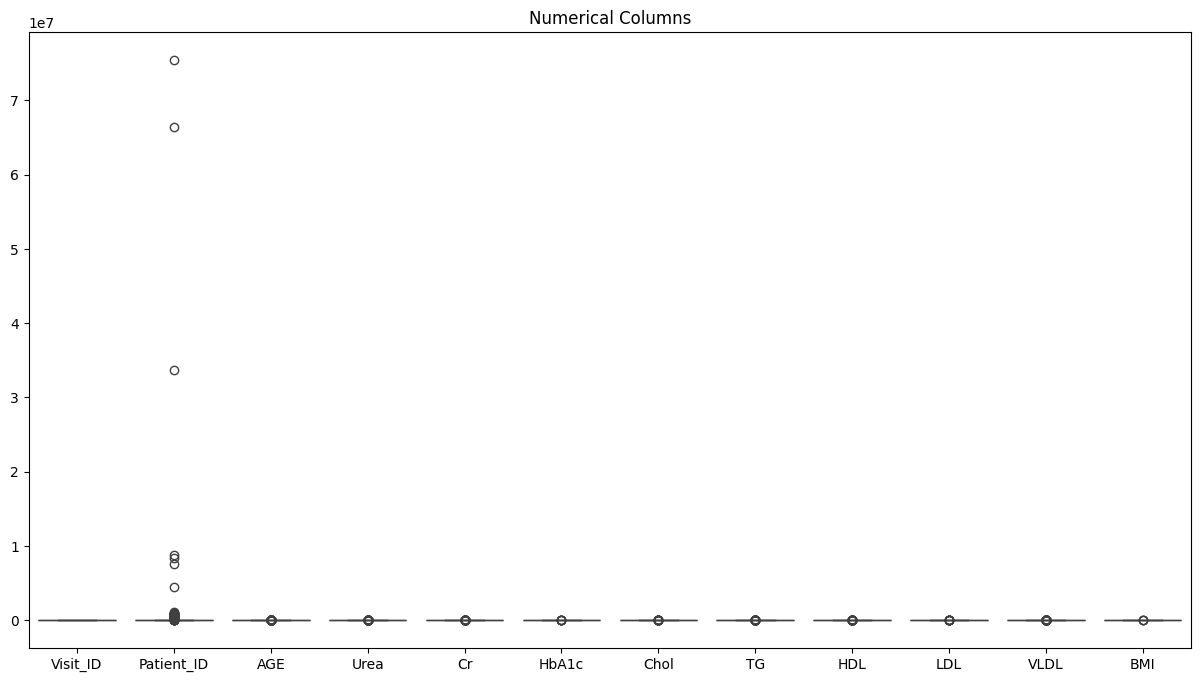

In [ ]:
#Box Plot of Numerical Columns:
plt.figure(figsize=(15,8))
sns.boxplot(diabetes, color="green")
plt.title("Numerical Columns")
plt.show()

#observation:
- In the Data set we  Patient_ID	have get outliers
- data point are in minimum decimal point is here

In [ ]:
#Identify Missing (Null) Values:
diabetes.isnull().sum()

,0
Visit_ID,0
Patient_ID,0
Gender,3
AGE,1
Urea,1
Cr,2
HbA1c,3
Chol,2
TG,2
HDL,1


In [ ]:
diabetes['AGE'].fillna(diabetes['AGE'].mean(), inplace=True)
diabetes.isnull().sum()

/tmp/ipython-input-80-761191020.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes['AGE'].fillna(diabetes['AGE'].mean(), inplace=True)


,0
Visit_ID,0
Patient_ID,0
Gender,3
AGE,0
Urea,1
Cr,2
HbA1c,3
Chol,2
TG,2
HDL,1


In [ ]:
diabetes['Gender'].fillna(diabetes['Gender'].mode()[0], inplace=True)
diabetes.isnull().sum()

/tmp/ipython-input-81-737100946.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes['Gender'].fillna(diabetes['Gender'].mode()[0], inplace=True)


,0
Visit_ID,0
Patient_ID,0
Gender,0
AGE,0
Urea,1
Cr,2
HbA1c,3
Chol,2
TG,2
HDL,1


In [ ]:
#use forloop for Remove null values
null_remove = ['Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL']
for col in null_remove:
  diabetes[col].fillna(diabetes[col].mean(), inplace=True)

/tmp/ipython-input-82-4019800250.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes[col].fillna(diabetes[col].mean(), inplace=True)


In [ ]:
diabetes.isnull().sum()

,0
Visit_ID,0
Patient_ID,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


##Outlier Handling:
Outliers in medical data may represent critical conditions and, depending on the context, should be retained or removed with care.

###a.Retain Outliers:
1. AGE:

- These groups often have different health risks and must be included for accurate analysis.



2. HbA1c (Hemoglobin A1c):

- High values may reflect uncontrolled diabetes.

- Low values may suggest hypoglycemia or anemia.

- Removing them may eliminate real and clinically important conditions.



3. BMI (Body Mass Index):

- Extremely high or low BMI values can represent obesity or malnutrition.

- Important for predicting cardiovascular or metabolic diseases.

###b.	Filter Outliers:

In [ ]:
diabetes['Cr'].describe()

,Cr
count,1009.000000
mean,68.938431
std,59.756302
min,6.000000
25%,48.000000
50%,60.000000
75%,73.000000
max,800.000000


In [ ]:
# Filter Outliers in cr and urea
cr = diabetes['Cr'].quantile(0.995)
urea = diabetes['Urea'].quantile(0.999)
print("Filter Outliers for cr:",cr)
print("Filter Outliers for urea :",urea)

Filter Outliers for cr: 401.0
Filter Outliers for urea : 26.38080000000018


In [ ]:
newdf1 = diabetes[diabetes['Cr'] <= cr]

newdf2= diabetes[diabetes['Urea'] <= urea]

##c.	Remove Extreme Outliers:

In [ ]:
lipid_col = ['LDL', 'VLDL', 'HDL', 'TG', 'Chol']
#useforloop
for col in lipid_col:
    Q1 = diabetes[col].quantile(0.25)
    Q3 = diabetes[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    diabetes1 = diabetes[(diabetes[col] >= lower_bound) & (diabetes[col] <= upper_bound)]


In [ ]:
diabetes1

,Visit_ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y
1005,195,4543,f,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
1006,249,48822,M,55.0,4.2,57.0,8.9,5.3,3.1,0.7,3.3,1.4,27.0,Y
1007,88,21747,M,41.0,3.8,48.0,4.3,3.2,4.5,1.3,1.8,1.1,21.0,N


###Check for Duplicates:

In [ ]:
diabetes = diabetes.drop_duplicates()
diabetes.shape #duplicates remove shape

(1006, 14)

In [ ]:
diabetes1.shape #Remove Extreme Outliers: For lipid-related columns

(982, 14)

#2.	Data Transformation:

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [ ]:
diabetesle = diabetes.copy()

In [ ]:
#Feature Engineering: LabelEncoder
label_encoder = LabelEncoder()
diabetesle['Gender'] = LabelEncoder().fit_transform(diabetesle['Gender'])
diabetesle['Gender']

,Gender
0,0
1,1
2,0
3,0
4,1
...,...
1001,1
1002,1
1003,1
1004,0


In [ ]:
#	Feature Scaling: standardization
numerical_columns = ['Patient_ID','AGE', 'BMI', 'Cr']
scaler = StandardScaler()
scaler_data = scaler.fit_transform(diabetesle[numerical_columns])
scaler_data

array([[-0.07553165, -0.41262951, -1.12873153, -0.38428673],
       [-0.07070945, -3.15894591, -1.33077058, -0.11677042],
       [-0.06662694, -0.41262951, -1.12873153, -0.38428673],
       ...,
       [ 0.05398478,  0.96052868,  0.10370669,  0.21762497],
       [ 0.05398478,  0.38837943, -0.11853627,  0.01698774],
       [-0.07951859,  0.15951973,  0.68961994, -0.58492397]])